# Day 5: Data Visualisation - Bivariate Analysis

## Task:
- Ex­plore re­la­tion­ships between pairs of vari­ables in the data­set.

## De­scrip­tion: 
- Cre­ate scat­ter plots to visu­al­ise re­la­tion­ships between two vari­ables.  

## What is Bivariate Analysis?

Bivariate data analysis involves examining the relationship between two variables. In statistics, variables can be categorized as either independent (predictor) variables or dependent (response) variables. Bivariate analysis is concerned with understanding how changes in one variable are associated with changes in another variable.

Some common techniques used in bivariate data analysis include:

- Scatter plots: Scatter plots are graphical representations of the relationship between two variables. Each point on the plot represents an observation with values for both variables. Scatter plots help visualize patterns, trends, and the strength of the relationship between variables.

- Correlation analysis: Correlation analysis measures the strength and direction of the linear relationship between two variables. The correlation coefficient, typically denoted by "r," ranges from -1 to 1. A positive value indicates a positive relationship, a negative value indicates a negative relationship, and the magnitude of the value indicates the strength of the relationship.

- Regression analysis: Regression analysis is used to quantify the relationship between two variables by fitting a regression model. This model predicts the value of the dependent variable based on the value of the independent variable(s). Linear regression is a common technique where a straight line is fitted to the data, but there are also other types of regression models.

- Contingency tables and chi-square tests: Contingency tables are used when both variables are categorical. They summarize the joint distribution of the variables and can be used to test for independence between the variables using a chi-square test.

- Categorical data visualization: When dealing with categorical variables, techniques such as bar charts, stacked bar charts, and mosaic plots are used to visualize the relationship between the variables.

By analyzing and visualizing bivariate data, researchers can gain insights into the relationship between variables, identify patterns, detect outliers, and make predictions. These techniques are widely used in various fields such as economics, social sciences, medicine, and business.

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

### Dataset = Black Friday Sales


In [56]:
df = pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Data Preprocessing

- Check basic statistics of the dataset

- Check for missing values in the data

- Check for unique values in data

In [57]:
# Obtain dataset information
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 5

In [58]:
# .describe() to obtain the summary statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [59]:
# Identify NaN values in table format
df.isna()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,False,False,False,False,False,False,False,False,False,True,True,False
550064,False,False,False,False,False,False,False,False,False,True,True,False
550065,False,False,False,False,False,False,False,False,False,True,True,False
550066,False,False,False,False,False,False,False,False,False,True,True,False


In [60]:
# Count NaN values in each column
nan_values_count = df.isna().sum()

print("\nCount of NaN values in each column:")

# Print the result
print(nan_values_count)


Count of NaN values in each column:
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


## Perform EDA

- Purchase Distribution

- Drop unnecessary columns

- Missing value treatment


In [61]:
# Drop columns with NaN values
df_cleaned = df.dropna(axis=1)

# Print the cleaned DataFrame
print(df_cleaned)


        User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0                   3   
1            

In [62]:
# Count NaN values in each column
nan_values_count = df_cleaned.isna().sum()

print("\nCount of NaN values in each column:")

# Print the result
print(nan_values_count)

df = df.dropna(axis=1)

'''
This has dropped all columns containing NaN values from the DataFrame 
and stored the result in a new DataFrame called df_cleaned. 
I have overwritten the original DataFrame, by assigning the 
result back to df via df = df.dropna(axis=1).

Product_Cateogry_2 & ..._3 have now been dropped.
'''


Count of NaN values in each column:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64


'\nThis has dropped all columns containing NaN values from the DataFrame \nand stored the result in a new DataFrame called df_cleaned. \nI have overwritten the original DataFrame, by assigning the \nresult back to df via df = df.dropna(axis=1).\n\nProduct_Cateogry_2 & ..._3 have now been dropped.\n'

## Data Visualisation

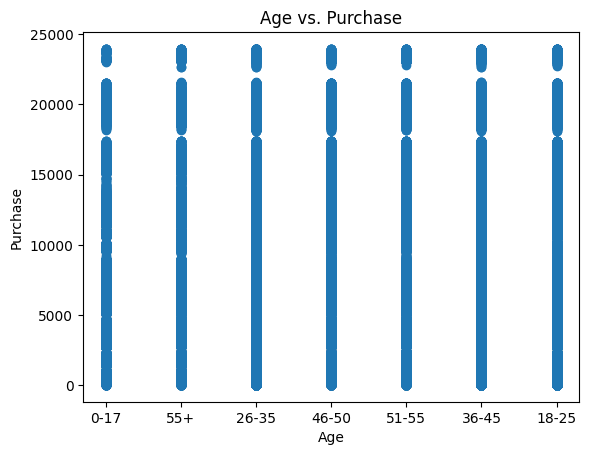

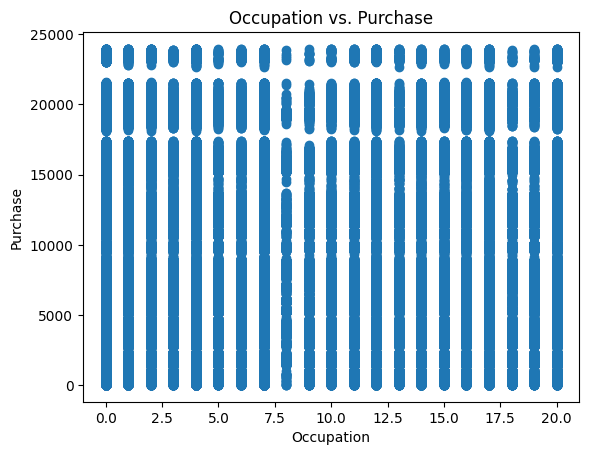

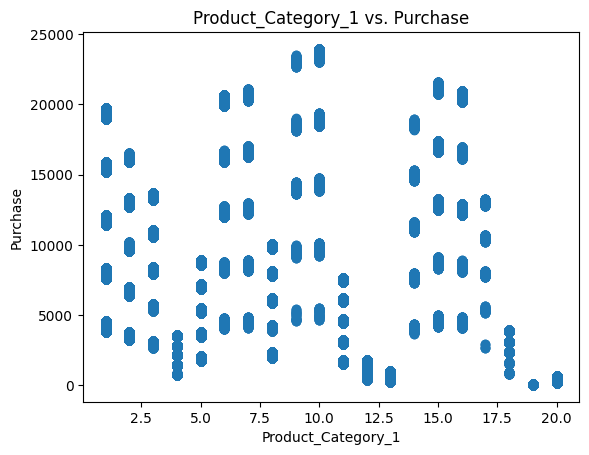

In [63]:
# Scatter plot of Age vs. Purchase
plt.scatter(df['Age'], df['Purchase'])
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.title('Age vs. Purchase')
plt.show()

# Scatter plot of Occupation vs. Purchase
plt.scatter(df['Occupation'], df['Purchase'])
plt.xlabel('Occupation')
plt.ylabel('Purchase')
plt.title('Occupation vs. Purchase')
plt.show()

# Scatter plot of Product_Category_1 vs. Purchase
plt.scatter(df['Product_Category_1'], df['Purchase'])
plt.xlabel('Product_Category_1')
plt.ylabel('Purchase')
plt.title('Product_Category_1 vs. Purchase')
plt.show()

## Uninformative Plots

This could be due to a number of reasons:

- **Data Distribution**: If the data points are highly concentrated or spread out unevenly across the plot, it may result in a cluttered or sparse scatter plot, making it difficult for me to discern any meaningful patterns.

- **Scale**: If the scales of the axes are not appropriately chosen, it could compress or stretch the data, leading to distortions in the scatter plot.

- **Outliers**: Outliers in the data can heavily influence the appearance of a scatter plot, especially if they are extreme values that skew the distribution.

- **Missing Values**: If there are missing values in the data, they might disrupt the continuity of the scatter plot and make it harder for me to interpret.

- **Correlation Strength**: If there's weak or no correlation between the variables being plotted, the scatter plot may appear as a random distribution of points without any discernible pattern.

- **Overplotting**: When there are too many data points overlapping each other, it can create a dense cluster of points, making it difficult for me to distinguish individual points or identify any trends.

To improve the quality of the scatter plots, I may need to preprocess the data, handle missing values, remove outliers, adjust the scales of the axes, or consider using alternative visualization techniques depending on the nature of my data and the insights I'm trying to extract. Additionally, it's essential for me to choose appropriate visualization tools and parameters to effectively convey the information I want to communicate.





